In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd="/home/aman/anaconda3/envs/tallyInvoiceParser.env/bin/tesseract"
os.environ['TESSDATA_PREFIX'] = "/home/aman/anaconda3/envs/tallyInvoiceParser.env/share/tessdata"
import import_ipynb
from textPreProcessor import *
from imagePreProcessor import *
from datetime import datetime
import math

2023-06-08 09:40:56.648558: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 09:40:57.931215: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-06-08 09:40:59.624036: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-08 09:40:59.640910: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

importing Jupyter notebook from textPreProcessor.ipynb
Original Date ----> After Processing 

5/12/22      ---->      5-12-2022
2/2/2023      ---->      2-2-2023
5:12-2023      ---->      5-12-2023
5,May,2023      ---->      5-05-2023
5 May,2023      ---->      5-05-2023
October 24,2022      ---->      10-24-2022
importing Jupyter notebook from imagePreProcessor.ipynb


In [2]:
pwd

'/home/aman/Documents/Tally/DocumentAI/Code'

In [3]:
imagesDir = '/home/aman/Documents/Tally/DocumentAI/Data/images/'

In [4]:
os.chdir(imagesDir)

In [5]:
imagePath="3.jpeg"

In [6]:
image = cv2.imread(imagePath)

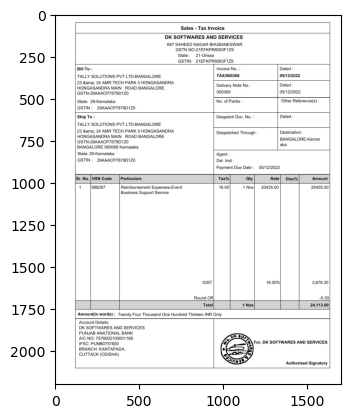

In [7]:
plt.imshow(image)

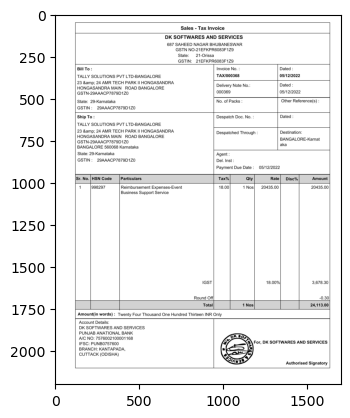

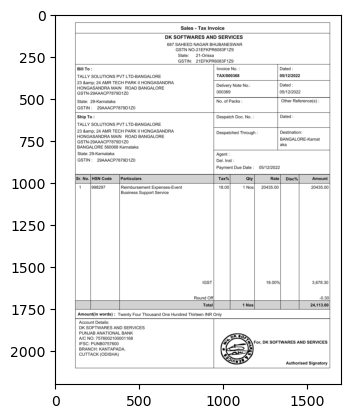

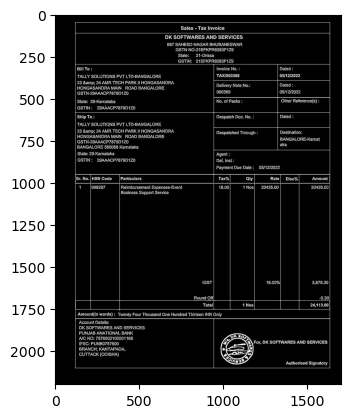

In [8]:
preProcessedImage = preProcessImage(imagePath)

In [9]:
data = pytesseract.image_to_data(preProcessedImage, output_type=Output.DATAFRAME)

In [10]:
df = pd.DataFrame(data)

In [11]:
df

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1700,2200,-1.0,NaN
1,2,1,1,0,0,0,123,49,1509,4,-1.0,NaN
2,3,1,1,1,0,0,123,49,1509,4,-1.0,NaN
3,4,1,1,1,1,0,123,49,1509,4,-1.0,NaN
4,5,1,1,1,1,1,123,49,1509,4,95.0,
...,...,...,...,...,...,...,...,...,...,...,...,...
336,5,1,32,1,1,1,942,301,4,1802,95.0,
337,2,1,33,0,0,0,123,2103,1509,4,-1.0,NaN
338,3,1,33,1,0,0,123,2103,1509,4,-1.0,NaN
339,4,1,33,1,1,0,123,2103,1509,4,-1.0,NaN


In [12]:
df.dropna(inplace=True)

In [13]:
toDrop = []
for col in df.columns:
    if len(df[col].unique())==1:
        toDrop.append(col)
df.drop(columns=toDrop, inplace=True)

indexesToDrop = []
stopwords = ["", " ", "  ", "/", ":", "-", ".", ",", "\n", "\t", "\\", "(", ")", "[", "]", "{", "}", "*", "&", "%", "$", "#", "|"]
for index in df.index:
    if df["conf"][index]<=40:
        indexesToDrop.append(index)
    elif df["text"][index] in stopwords:
        indexesToDrop.append(index)   
df.drop(indexesToDrop, inplace=True)

df

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
8,2,1,1,1,748,73,74,22,92.609673,Sales
9,2,1,1,2,833,72,67,23,63.152985,-.Tax
10,2,1,1,3,909,72,98,23,96.833557,Invoice
14,3,1,1,1,655,126,41,23,96.860558,DK
15,3,1,1,2,705,121,184,28,96.170357,SOFTWARES
...,...,...,...,...,...,...,...,...,...,...
312,27,3,2,2,263,1977,160,31,76.039253,"KANTAPADA,-"
314,27,3,3,1,144,2013,116,20,93.004517,CUTTACK
315,27,3,3,2,268,2013,110,25,88.019630,(ODISHA)
323,29,1,1,1,1373,2064,127,21,96.732368,Authorised


In [14]:
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)

In [15]:
df

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,2,1,1,1,748,73,74,22,92.609673,Sales
1,2,1,1,2,833,72,67,23,63.152985,-.Tax
2,2,1,1,3,909,72,98,23,96.833557,Invoice
3,3,1,1,1,655,126,41,23,96.860558,DK
4,3,1,1,2,705,121,184,28,96.170357,SOFTWARES
...,...,...,...,...,...,...,...,...,...,...
144,27,3,2,2,263,1977,160,31,76.039253,"KANTAPADA,-"
145,27,3,3,1,144,2013,116,20,93.004517,CUTTACK
146,27,3,3,2,268,2013,110,25,88.019630,(ODISHA)
147,29,1,1,1,1373,2064,127,21,96.732368,Authorised


In [16]:
df["x"] = df["left"] + df["width"] 
df["y"] = df["top"] + df["height"]

In [17]:
df

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,x,y
0,2,1,1,1,748,73,74,22,92.609673,Sales,822,95
1,2,1,1,2,833,72,67,23,63.152985,-.Tax,900,95
2,2,1,1,3,909,72,98,23,96.833557,Invoice,1007,95
3,3,1,1,1,655,126,41,23,96.860558,DK,696,149
4,3,1,1,2,705,121,184,28,96.170357,SOFTWARES,889,149
...,...,...,...,...,...,...,...,...,...,...,...,...
144,27,3,2,2,263,1977,160,31,76.039253,"KANTAPADA,-",423,2008
145,27,3,3,1,144,2013,116,20,93.004517,CUTTACK,260,2033
146,27,3,3,2,268,2013,110,25,88.019630,(ODISHA),378,2038
147,29,1,1,1,1373,2064,127,21,96.732368,Authorised,1500,2085


In [18]:
dateDF = df.copy()

In [19]:
dateDF

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,x,y
0,2,1,1,1,748,73,74,22,92.609673,Sales,822,95
1,2,1,1,2,833,72,67,23,63.152985,-.Tax,900,95
2,2,1,1,3,909,72,98,23,96.833557,Invoice,1007,95
3,3,1,1,1,655,126,41,23,96.860558,DK,696,149
4,3,1,1,2,705,121,184,28,96.170357,SOFTWARES,889,149
...,...,...,...,...,...,...,...,...,...,...,...,...
144,27,3,2,2,263,1977,160,31,76.039253,"KANTAPADA,-",423,2008
145,27,3,3,1,144,2013,116,20,93.004517,CUTTACK,260,2033
146,27,3,3,2,268,2013,110,25,88.019630,(ODISHA),378,2038
147,29,1,1,1,1373,2064,127,21,96.732368,Authorised,1500,2085


In [20]:
for index in dateDF.index:
    text = dateDF["text"][index]
    dateDF["text"][index] = preProcessText(text)

/tmp/ipykernel_4822/2254876534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateDF["text"][index] = preProcessText(text)


In [21]:
dateDF

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,x,y
0,2,1,1,1,748,73,74,22,92.609673,sales,822,95
1,2,1,1,2,833,72,67,23,63.152985,-.tax,900,95
2,2,1,1,3,909,72,98,23,96.833557,invoice,1007,95
3,3,1,1,1,655,126,41,23,96.860558,dk,696,149
4,3,1,1,2,705,121,184,28,96.170357,softwares,889,149
...,...,...,...,...,...,...,...,...,...,...,...,...
144,27,3,2,2,263,1977,160,31,76.039253,"kantapada,-",423,2008
145,27,3,3,1,144,2013,116,20,93.004517,cuttack,260,2033
146,27,3,3,2,268,2013,110,25,88.019630,(odisha),378,2038
147,29,1,1,1,1373,2064,127,21,96.732368,authorised,1500,2085


In [22]:
format = "%d-%m-%Y"
dates = []
for index in dateDF.index:
    text = dateDF["text"][index]
    res = True
    try:
        res = bool(datetime.strptime(text, format))
    except ValueError:
        res = False
    if str(res)=="True":
        dates.append(dateDF["text"][index])

In [23]:
dates

['05-12-2022', '05-12-2022']

In [24]:
dateDF[dateDF["text"] == dates[0]]

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,x,y
24,11,2,1,6,1336,357,121,19,94.085846,05-12-2022,1457,376
88,12,1,1,4,1213,896,123,26,87.991821,05-12-2022,1336,922


In [25]:
df

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,x,y
0,2,1,1,1,748,73,74,22,92.609673,Sales,822,95
1,2,1,1,2,833,72,67,23,63.152985,-.Tax,900,95
2,2,1,1,3,909,72,98,23,96.833557,Invoice,1007,95
3,3,1,1,1,655,126,41,23,96.860558,DK,696,149
4,3,1,1,2,705,121,184,28,96.170357,SOFTWARES,889,149
...,...,...,...,...,...,...,...,...,...,...,...,...
144,27,3,2,2,263,1977,160,31,76.039253,"KANTAPADA,-",423,2008
145,27,3,3,1,144,2013,116,20,93.004517,CUTTACK,260,2033
146,27,3,3,2,268,2013,110,25,88.019630,(ODISHA),378,2038
147,29,1,1,1,1373,2064,127,21,96.732368,Authorised,1500,2085


In [26]:
neighbourFields = ["date", "dated", "invoice", "delivery", "order", "due", "payment", "tax", "bill", "receipt", "issue"]

In [27]:
def createColumn(df, list):
    for col in list:
        df[col]=0

In [28]:
createColumn(df, neighbourFields)

In [29]:
df

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,...,dated,invoice,delivery,order,due,payment,tax,bill,receipt,issue
0,2,1,1,1,748,73,74,22,92.609673,Sales,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,2,833,72,67,23,63.152985,-.Tax,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,3,909,72,98,23,96.833557,Invoice,...,0,0,0,0,0,0,0,0,0,0
3,3,1,1,1,655,126,41,23,96.860558,DK,...,0,0,0,0,0,0,0,0,0,0
4,3,1,1,2,705,121,184,28,96.170357,SOFTWARES,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,27,3,2,2,263,1977,160,31,76.039253,"KANTAPADA,-",...,0,0,0,0,0,0,0,0,0,0
145,27,3,3,1,144,2013,116,20,93.004517,CUTTACK,...,0,0,0,0,0,0,0,0,0,0
146,27,3,3,2,268,2013,110,25,88.019630,(ODISHA),...,0,0,0,0,0,0,0,0,0,0
147,29,1,1,1,1373,2064,127,21,96.732368,Authorised,...,0,0,0,0,0,0,0,0,0,0


In [30]:
def returnDist(x1, y1, x2, y2):
    p = [x1, y1]
    q = [x2, y2]
    return math.dist(p, q)

In [31]:
for index in df.index:
    x1 = df["x"][index]
    y1 = df["y"][index]
    

In [32]:
d = df[df.index==24]

In [33]:
d

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,...,dated,invoice,delivery,order,due,payment,tax,bill,receipt,issue
24,11,2,1,6,1336,357,121,19,94.085846,05/12/2022,...,0,0,0,0,0,0,0,0,0,0


In [34]:
x1 = d["x"][24]
y1 = d["y"][24]
block = d["block_num"][24]
para = d["par_num"][24]

In [35]:
neighbours = []
for index in df.index:
    x2 = df["x"][index]
    y2 = df["y"][index]
    dist = returnDist(x1, y1, x2, y2)
    if dist<100:
        neighbours.append(df["text"][index])

In [36]:
neighbours

['Dated', '05/12/2022', '4.', 'Dated']

In [37]:
lineNeighbours = []
for index in df.index:
    x2 = df["x"][index]
    y2 = df["y"][index]
    blockN = df["block_num"][index]
    paraN = df["par_num"][index]
    if abs(y1-y2)<50 and (x2-x1)<10 and abs(blockN-block)<=1 and abs(paraN==para)<=1:
        lineNeighbours.append(df["text"][index])

In [38]:
lineNeighbours

['Bill',
 'To:',
 'Invoice',
 'No.:',
 'Dated',
 'TALLY',
 'SOLUTIONS',
 'PVT',
 'LTD-BANGALORE',
 'TAX/000368',
 '05/12/2022',
 '23',
 'AMR',
 'TECH',
 '4.']

In [39]:
def allocateNeighbours(df, neighbourFields):
    for index in df.index:
        x1 = df["x"][index]
        y1 = df["y"][index]
        block = df["block_num"][index]
        para = df["par_num"][index]
        neighbours = []
        for index2 in df.index:
            x2 = df["x"][index2]
            y2 = df["y"][index2]
            block2 = df["block_num"][index2]
            para2 = df["par_num"][index2]
            dist = returnDist(x1, y1, x2, y2)
            if dist<100:
                neighbours.append(df["text"][index2].lower())
            if abs(y1-y2)<50 and (x2-x1)<10 and abs(block2-block)<=1 and abs(para2==para)<=1:
                neighbours.append(df["text"][index2].lower())
        for n in neighbourFields:
            if n in neighbours:
                df[n][index]=1

In [40]:
allocateNeighbours(df, neighbourFields)

/tmp/ipykernel_4822/2103953982.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[n][index]=1


In [41]:
df.describe()

,block_num,par_num,line_num,word_num,left,top,width,height,conf,x,...,dated,invoice,delivery,order,due,payment,tax,bill,receipt,issue
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,...,149.000000,149.000000,149.000000,149.0,149.000000,149.000000,149.0,149.000000,149.0,149.0
mean,15.147651,3.006711,1.436242,3.449664,665.536913,950.590604,95.241611,23.926174,88.407927,760.778523,...,0.033557,0.046980,0.053691,0.0,0.040268,0.053691,0.0,0.073826,0.0,0.0
std,7.727955,2.355260,0.756255,2.392094,450.649839,618.919962,56.321069,5.755249,12.159623,443.615944,...,0.180693,0.212309,0.226168,0.0,0.197251,0.226168,0.0,0.262369,0.0,0.0
min,2.000000,1.000000,1.000000,1.000000,128.000000,72.000000,8.000000,13.000000,40.579567,152.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,11.000000,1.000000,1.000000,2.000000,243.000000,430.000000,56.000000,20.000000,86.409294,359.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
50%,11.000000,2.000000,1.000000,3.000000,575.000000,757.000000,81.000000,22.000000,93.004517,696.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
75%,24.000000,4.000000,2.000000,5.000000,1008.000000,1679.000000,121.000000,26.000000,96.366295,1097.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
max,29.000000,9.000000,4.000000,11.000000,1572.000000,2064.000000,303.000000,51.000000,96.971024,1628.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0


In [42]:
dates

['05-12-2022', '05-12-2022']

In [43]:
indexes = []
for date in dates:
    i = dateDF[dateDF["text"]==date].index
    for index in i:
        indexes.append(index)
indexes

[24, 88, 24, 88]

In [44]:
resultDF=df.copy()

In [45]:
indexesToDrop=[]
for index in resultDF.index:
    if index not in indexes:
        indexesToDrop.append(index)
resultDF.drop(indexesToDrop, inplace=True)

In [46]:
resultDF

,block_num,par_num,line_num,word_num,left,top,width,height,conf,text,...,dated,invoice,delivery,order,due,payment,tax,bill,receipt,issue
24,11,2,1,6,1336,357,121,19,94.085846,05/12/2022,...,1,1,0,0,0,0,0,1,0,0
88,12,1,1,4,1213,896,123,26,87.991821,05/12/2022,...,0,0,0,0,1,1,0,0,0,0
